In [7]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [9]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [10]:
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

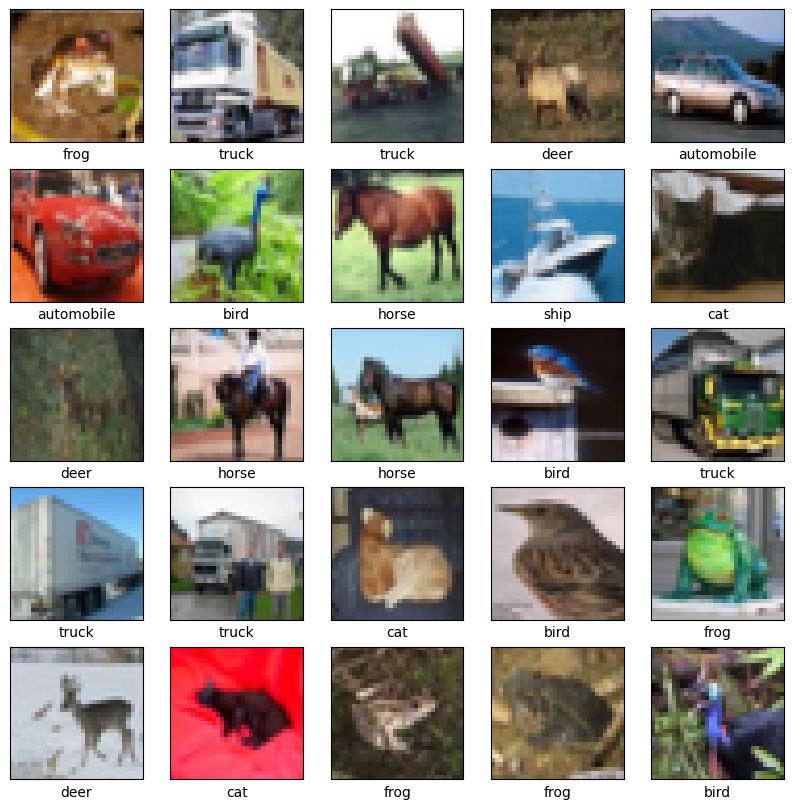

In [14]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [15]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [16]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [17]:
# Checking the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [18]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [19]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
    validation_data=(test_images, test_labels))

Epoch 1/100
782/782 [==============================] - 228s 287ms/step - loss: 1.7526 - accuracy: 0.3969 - val_loss: 1.3655 - val_accuracy: 0.5139
Epoch 2/100
782/782 [==============================] - 226s 289ms/step - loss: 1.1987 - accuracy: 0.5726 - val_loss: 0.9732 - val_accuracy: 0.6566
Epoch 3/100
782/782 [==============================] - 223s 285ms/step - loss: 1.0067 - accuracy: 0.6449 - val_loss: 0.9058 - val_accuracy: 0.6775
Epoch 4/100
782/782 [==============================] - 223s 285ms/step - loss: 0.8976 - accuracy: 0.6870 - val_loss: 0.9176 - val_accuracy: 0.6885
Epoch 5/100
782/782 [==============================] - 224s 286ms/step - loss: 0.8228 - accuracy: 0.7132 - val_loss: 0.7026 - val_accuracy: 0.7551
Epoch 6/100
782/782 [==============================] - 217s 277ms/step - loss: 0.7615 - accuracy: 0.7353 - val_loss: 0.8951 - val_accuracy: 0.6986
Epoch 7/100
782/782 [==============================] - 208s 266ms/step - loss: 0.7246 - accuracy: 0.7493 - val_loss: 0

Text(0.5, 1.0, 'Loss Curves')

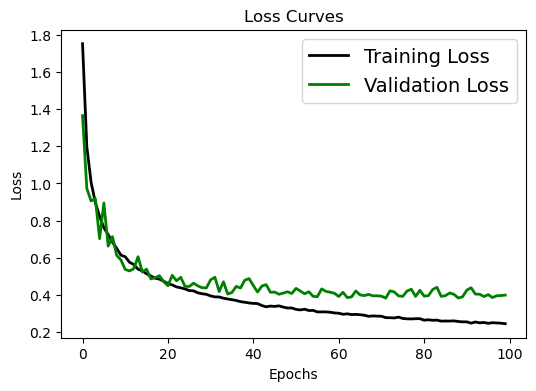

In [21]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)


Text(0.5, 1.0, 'Accuracy Curves')

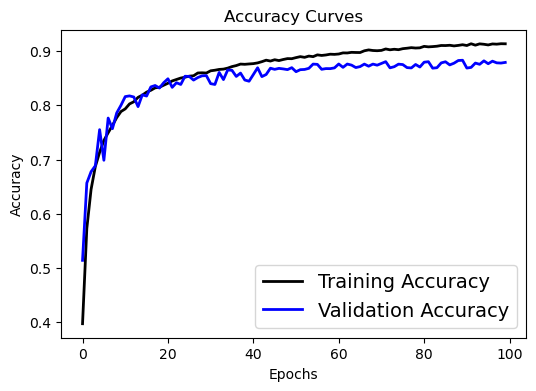

In [22]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [23]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)


313/313 [==============================] - 10s 27ms/step
[[1.33114727e-05 2.86789623e-06 8.26779229e-04 ... 3.60901572e-06
  1.16398078e-05 9.32100988e-07]
 [6.28819308e-09 1.84797898e-06 5.86153348e-12 ... 5.12924664e-14
  9.99998093e-01 1.73386777e-10]
 [4.51097640e-06 1.83092849e-03 1.00865850e-06 ... 7.01336589e-08
  9.98143196e-01 4.44714760e-06]
 ...
 [1.90793319e-08 3.52913276e-09 1.10321398e-05 ... 2.16481681e-06
  1.65643694e-08 8.99909214e-09]
 [5.25198225e-03 9.94303346e-01 2.63820402e-05 ... 1.02717956e-06
  1.09497654e-04 4.47555503e-05]
 [3.91106175e-10 1.35913419e-10 5.13664444e-09 ... 9.99987245e-01
  7.69763697e-11 1.78574752e-10]]


In [24]:
# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[3 8 8 ... 5 1 7]


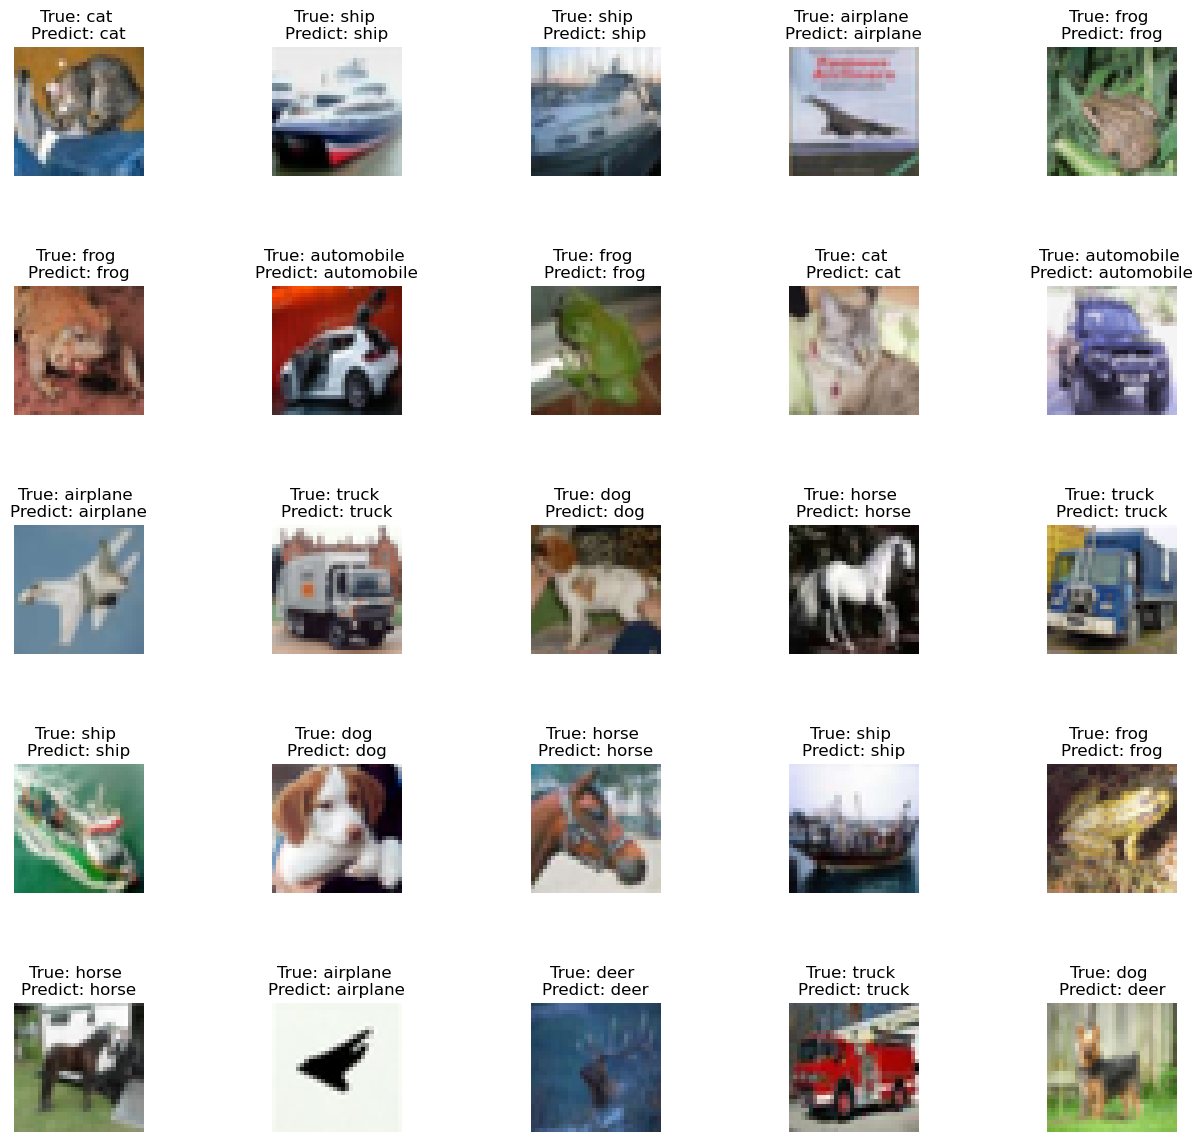

In [25]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)